# Region Growing (Own Implementation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from skimage.color import rgb2lab

In [2]:
seedPoints = []

PARAMETERS = (
    ("EUCLIDEAN", 7.5),
    ("MANHATTAN", 25)
)
PICK = 0

##### User Input

Asks the user for input to get the seeds.

The user must click on the objects it wants the algorithm to detect (can be more than one)

<u><b>NOTE!!</b></u> The more seeds are provided, the more accurate the result will be.

In [3]:
IMG = cv2.imread("testImg1.jpg")

In [4]:
# Mouse callback functionw
def getCoords(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        seedPoints.append((x, y))
        print(f"Seed set at: ({x}, {y})")

        cv2.circle(seededImage, (x, y), 5, (0, 0, 255), -1)
        cv2.imshow("InputImage", seededImage)

# Load and display the image
seededImage = IMG.copy()
cv2.imshow("InputImage", seededImage)
cv2.setMouseCallback("InputImage", getCoords)

# Wait until any key is pressed to close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/e-rivers/Documents/MASTERs/3rdSemester/ComputerVision/CS5050_ComputerVision/ComputerVisionVenv/lib/python3.12/site-packages/cv2/qt/plugins"
QFont::fromString: Invalid description 'VictorMono Nerd Font,10,-1,5,600,0,0,0,0,0,0,0,0,0,0,1,SemiBold'
QFont::fromString: Invalid description 'Hack,10,-1,5,400,0,0,0,0,0,0,0,0,0,0,1'
QFont::fromString: Invalid description 'VictorMono Nerd Font,10,-1,5,600,0,0,0,0,0,0,0,0,0,0,1,SemiBold'
QFont::fromString: Invalid description 'VictorMono Nerd Font,10,-1,5,600,0,0,0,0,0,0,0,0,0,0,1,SemiBold'


Seed set at: (415, 84)
Seed set at: (421, 121)
Seed set at: (381, 143)
Seed set at: (480, 128)
Seed set at: (542, 125)
Seed set at: (608, 94)
Seed set at: (585, 113)
Seed set at: (593, 152)
Seed set at: (503, 161)
Seed set at: (504, 172)
Seed set at: (459, 162)
Seed set at: (481, 152)
Seed set at: (479, 175)
Seed set at: (466, 194)
Seed set at: (498, 207)
Seed set at: (528, 168)
Seed set at: (537, 204)
Seed set at: (580, 228)
Seed set at: (613, 232)
Seed set at: (532, 224)
Seed set at: (531, 281)
Seed set at: (502, 228)
Seed set at: (359, 209)
Seed set at: (382, 200)
Seed set at: (404, 207)
Seed set at: (462, 215)
Seed set at: (391, 228)
Seed set at: (406, 222)
Seed set at: (415, 232)
Seed set at: (403, 241)
Seed set at: (443, 228)
Seed set at: (452, 288)
Seed set at: (482, 288)
Seed set at: (472, 296)
Seed set at: (479, 309)
Seed set at: (489, 303)
Seed set at: (484, 325)
Seed set at: (506, 297)
Seed set at: (488, 251)
Seed set at: (456, 252)
Seed set at: (416, 273)
Seed set at: (385,

Get the RGB versions of both seeded and unseeded images

In [5]:
image = cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB)
seededImage = cv2.cvtColor(seededImage, cv2.COLOR_BGR2RGB)

##### Region Growing Algorithm

In [6]:
objectImage = np.zeros_like(image)

In [7]:
for seed in seedPoints:
    current = image[seed[1], seed[0]]
    
    # Queue to explore the neighbor pixels
    toExploreQueue = [(seed[1], seed[0])]
    
    while len(toExploreQueue) > 0:
        # Get the next pixel from the queue
        y, x = toExploreQueue.pop(0)
        
        # This is just to avoid entering infinite loops by revisiting repeated pixels
        if objectImage[y, x].any() > 0:
            continue
        
        objectImage[y, x] = current
        
        # Get the neighbors of the current point (using 8-connectivity)
        # NOTE TO SELF!!!! Numpy keeps the image's shape inverted (width, height, RGB) is instead (height, width, RGB)
        neighbors = [
            (y-1, x),
            (y+1, x),
            (y, x-1),
            (y, x+1),
            (y-1, x-1),
            (y+1, x-1),
            (y+1, x+1),
            (y-1, x+1),
        ]
        
        for ny, nx in neighbors:
            # Checks if the neighbor is a valid pixel (doesn't exceeds the image size)
            if (0 <= ny and ny < image.shape[0]) and (0 <= nx and nx < image.shape[1]):
                # Adds more neighbors to the queue depending if the Euclidean distance is within the threshold T
                if PARAMETERS[PICK][0] == "EUCLIDEAN":
                    if ((current[0] - image[ny, nx][0])**2 + (current[1] - image[ny, nx][1])**2 + (current[2] - image[ny, nx][2])**2)**0.5 <= PARAMETERS[PICK][1]:
                        toExploreQueue.append((ny, nx))
                # Adds more neighbors to the queue depending if the Euclidean distance is within the threshold T
                elif PARAMETERS[PICK][0] == "MANHATTAN":
                    if abs(current[0] - image[ny, nx][0]) + abs(current[1] - image[ny, nx][1]) + abs(current[2] - image[ny, nx][2]) <= PARAMETERS[PICK][1]:
                        toExploreQueue.append((ny, nx))

/tmp/ipykernel_22860/3630489559.py:35: RuntimeWarning: overflow encountered in scalar subtract
  if ((current[0] - image[ny, nx][0])**2 + (current[1] - image[ny, nx][1])**2 + (current[2] - image[ny, nx][2])**2)**0.5 <= PARAMETERS[PICK][1]:
/tmp/ipykernel_22860/3630489559.py:35: RuntimeWarning: overflow encountered in scalar add
  if ((current[0] - image[ny, nx][0])**2 + (current[1] - image[ny, nx][1])**2 + (current[2] - image[ny, nx][2])**2)**0.5 <= PARAMETERS[PICK][1]:


##### Results

Display the original and resulting images

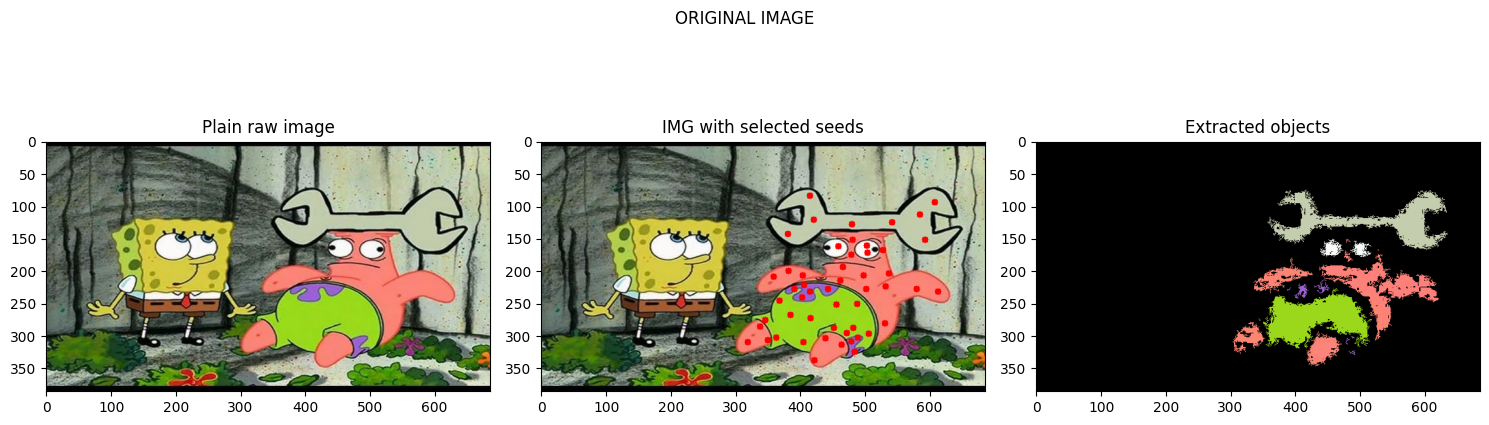

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("ORIGINAL IMAGE")

ax[0].imshow(image)
ax[0].set_title("Plain raw image")

ax[1].imshow(seededImage)
ax[1].set_title("IMG with selected seeds")

ax[2].imshow(objectImage)
ax[2].set_title("Extracted objects")

plt.tight_layout()
plt.show()

In [9]:
# Save image for future activities
cv2.imwrite('regionGrowing.png', objectImage)

True